In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
df_geral = pd.read_csv("clear-data/dados_tratados.csv")

C:\Users\desktop_TI_9\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_geral.head()

,ride_name,data_hora,wait_time,date,time,day_of_the_week,sale,holiday,holiday_season,season,...,HotWheels 1730,Acqua 1400,Acqua 1500,Madagascar 1500,Madagascar 1600,Madagascar 1700,Sonho 1800,Excalibur 1200,Excalibur 1430,Excalibur 1700
0,Autopista (bate-bate),2023-01-01 11:25:03,30,2023-01-01,11:25:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Autopista (bate-bate),2023-01-01 11:30:04,30,2023-01-01,11:30:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autopista (bate-bate),2023-01-01 11:35:03,30,2023-01-01,11:35:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autopista (bate-bate),2023-01-01 11:40:03,30,2023-01-01,11:40:03,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Autopista (bate-bate),2023-01-01 11:45:04,30,2023-01-01,11:45:04,sunday,NaN,new_year,summer vacation,high_season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Supondo que df_geral já esteja carregado
# Converter 'data_hora' para datetime se necessário
df_geral['data_hora'] = pd.to_datetime(df_geral['data_hora'])

# Criar uma nova coluna 'horario' com o formato HH:MM
df_geral['horario'] = df_geral['data_hora'].dt.strftime('%H:%M')

# Agrupar por 'horario' e calcular a média de 'wait_time'
df_horario_medio = df_geral.groupby('horario')['wait_time'].mean().reset_index()

# Renomear a coluna de média para refletir o que ela representa
df_horario_medio.rename(columns={'wait_time': 'media_wait_time'}, inplace=True)

# Mostrando o resultado
print(df_horario_medio.head())

  horario  media_wait_time
0   10:00        17.395264
1   10:05        17.234483
2   10:10        17.127214
3   10:15        17.102362
4   10:20        17.767883


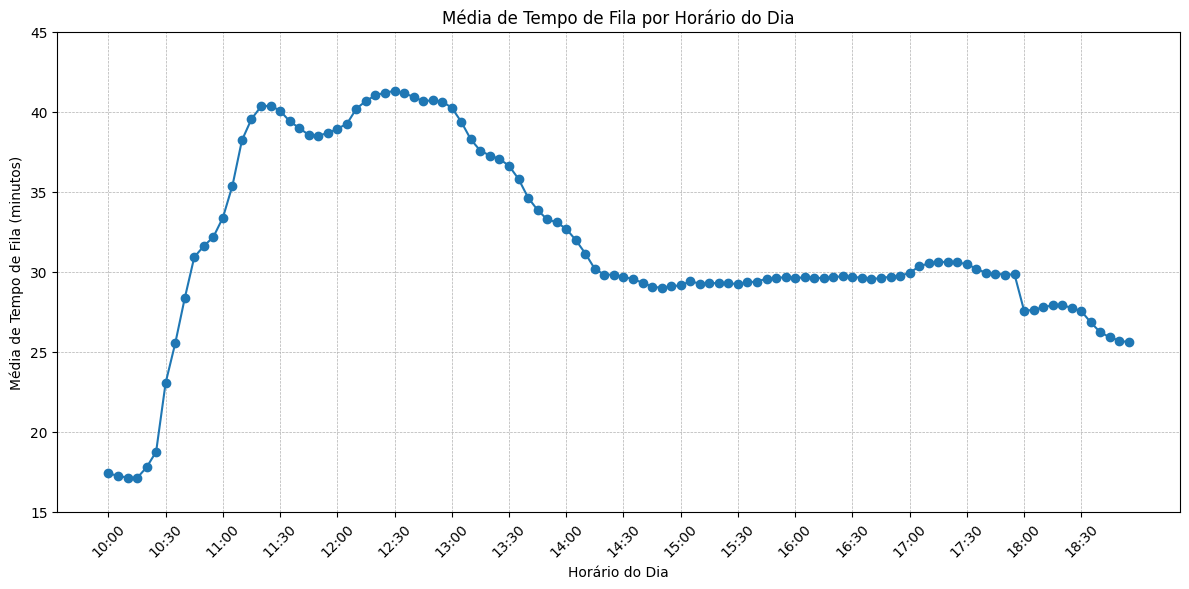

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df_horario_medio' é o seu DataFrame
# Converter 'horario' para string
df_horario_medio['horario'] = df_horario_medio['horario'].astype(str)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_horario_medio['horario'], df_horario_medio['media_wait_time'], marker='o')

# Configuração de etiquetas no eixo X
# Preparar uma lista com os horários de 30 em 30 minutos de 10:00 a 19:00
horarios_x = [f"{h:02}:00" for h in range(10, 20, 1) if h < 19] + [f"{h:02}:30" for h in range(10, 19, 1)]
horarios_x = sorted(horarios_x)
plt.xticks(horarios_x, rotation=45)  # Aplica os horários ao gráfico e rotaciona para melhor visualização

# Configuração de etiquetas no eixo Y
yticks_y = list(range(15, 50, 5))
plt.yticks(yticks_y)  # Aplica os minutos ao gráfico

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.title('Média de Tempo de Fila por Horário do Dia')
plt.xlabel('Horário do Dia')
plt.ylabel('Média de Tempo de Fila (minutos)')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()
